# REDES NEURONALES

Este fue el dataset utilizado: [este enlace](https://github.com/zalandoresearch/fashion-mnist).



In [4]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

In [5]:
mnist = tf.keras.datasets.fashion_mnist

In [6]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

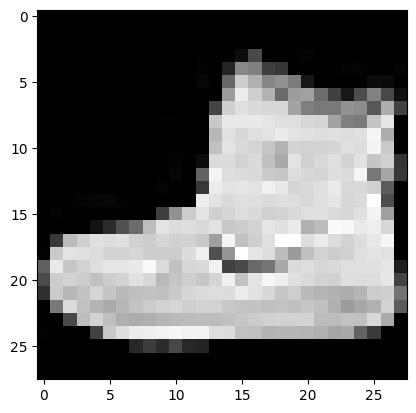

In [7]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

In [8]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

##  Información sobre el dataset

In [9]:
training_images_cuenta= len(training_images)
train_image_shape = training_images[0].shape


test_images_cuenta= len(test_images)
test_image_shape = test_images[0].shape

print("Cantidad de imágenes en el conjunto de train:", training_images_cuenta)
print("Tamaño de las imágenes en el conjunto de train:", train_image_shape)
print("Cantidad de imágenes en el conjunto de test:", test_images_cuenta)
print("Tamaño de las imágenes en el conjunto de test:", test_image_shape)

Cantidad de imágenes en el conjunto de train: 60000
Tamaño de las imágenes en el conjunto de train: (28, 28)
Cantidad de imágenes en el conjunto de test: 10000
Tamaño de las imágenes en el conjunto de test: (28, 28)


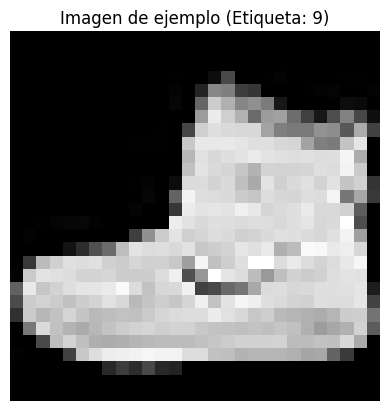

Información de la imagen:
Dimensiones: (28, 28)
Resolución de la imagen: 28x28 píxeles
Número total de píxeles en la imagen: 784
Valor mínimo de píxel (negro): 0.0
Valor máximo de píxel (blanco): 1.0
Valor medio de píxel: 0.3813875550220088
Desviación estándar de los valores de píxel: 0.3991856713852833


In [10]:
example_index = 0
example_image = training_images[example_index]
example_label = training_labels[example_index]

plt.imshow(example_image, cmap='gray')
plt.title("Imagen de ejemplo (Etiqueta: {})".format(example_label))
plt.axis('off')
plt.show()

print("Información de la imagen:")
print("Dimensiones:", example_image.shape)
print("Resolución de la imagen: {}x{} píxeles".format(example_image.shape[0], example_image.shape[1]))
print("Número total de píxeles en la imagen:", example_image.size)
print("Valor mínimo de píxel (negro):", np.min(example_image))
print("Valor máximo de píxel (blanco):", np.max(example_image))
print("Valor medio de píxel:", np.mean(example_image))
print("Desviación estándar de los valores de píxel:", np.std(example_image))

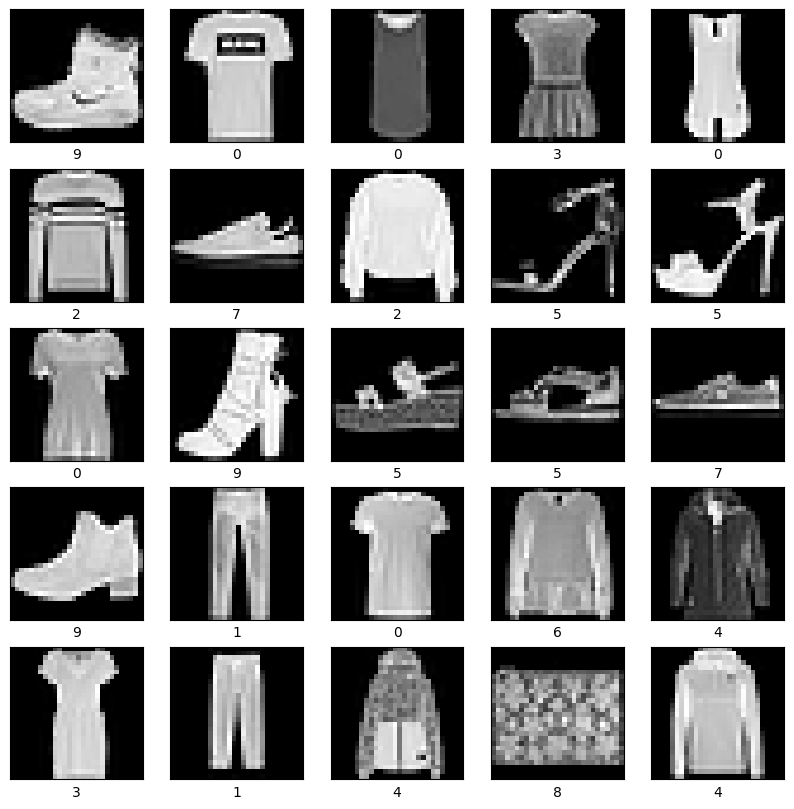

Etiquetas únicas: [0 1 2 3 4 5 6 7 8 9]
Frecuencia de cada clase: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap='gray')
    plt.xlabel(training_labels[i])
plt.show()

# Exploración de las etiquetas
# Imprimir las etiquetas únicas y contar la frecuencia de cada clase
unique_labels = np.unique(training_labels)
print("Etiquetas únicas:", unique_labels)
label_counts = {label: np.sum(training_labels == label) for label in unique_labels}
print("Frecuencia de cada clase:", label_counts)

## Creación del Modelo

In [12]:
from tensorflow.keras import layers, models

# Requisitos del modelo:
# Hidden layer de 128 unidades, activación sigmoid y optimizador Adam
# Última capa con activación softmax

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

model = models.Sequential([
    layers.Input(shape=(28, 28)),  # Usando Input para definir la forma de entrada
    layers.Flatten(),  # Capa de aplanamiento
    layers.Dense(128, activation='sigmoid'),  
    layers.Dense(10, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se piden 10 epochs y un batch size de 64 
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Se muestran también los resultados de loss y accuracy por cada epoch
losses = history.history['loss']
accuracies = history.history['accuracy']
val_losses = history.history['val_loss']
val_accuracies = history.history['val_accuracy']

for epoch in range(len(losses)):
    print("Epoch {}: Loss={:.4f}, Accuracy={:.4f}, Val Loss={:.4f}, Val Accuracy={:.4f}"
          .format(epoch+1, losses[epoch], accuracies[epoch], val_losses[epoch], val_accuracies[epoch]))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7454 - loss: 0.8213 - val_accuracy: 0.8322 - val_loss: 0.4691
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8503 - loss: 0.4200 - val_accuracy: 0.8518 - val_loss: 0.4155
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8636 - loss: 0.3790 - val_accuracy: 0.8523 - val_loss: 0.4078
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8728 - loss: 0.3509 - val_accuracy: 0.8657 - val_loss: 0.3767
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8813 - loss: 0.3279 - val_accuracy: 0.8652 - val_loss: 0.3704
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8867 - loss: 0.3151 - val_accuracy: 0.8702 - val_loss: 0.3589
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8904 - loss: 0.3066 - val_accuracy: 0.8747 - val_loss: 0.3526
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8951 - loss: 0.2885 - val_accuracy: 0.

In [13]:
#Procedí a realizar una evaluación del modelo a través de métricas de loss o pérdida y la precisión con accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Loss en el conjunto de datos de prueba:", test_loss)
print("Accuracy en el conjunto de datos de prueba:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8793 - loss: 0.3377
Loss en el conjunto de datos de prueba: 0.3399527072906494
Accuracy en el conjunto de datos de prueba: 0.8766999840736389




## Predicciones de la red neuronal


In [14]:
classifications = model.predict(test_images)
print("Clasificaciones para la primera entrada:", classifications[0])

predicted_class = np.argmax(classifications[0])
print("Clase predicha para la primera entrada:", predicted_class)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Clasificaciones para la primera entrada: [3.7272671e-06 1.0290377e-06 4.1192097e-06 4.1144435e-06 4.4820213e-06 3.8688049e-02 9.0536123e-06 5.4646514e-02 8.4837724e-05 9.0655398e-01]
Clase predicha para la primera entrada: 9


<h4>Entrenamiento de 512 neuronas en capa oculta</h4>

In [15]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

# Cambio de neuronas a 512:
model_512 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  
    layers.Dense(512, activation='sigmoid'),  
    layers.Dense(10, activation='softmax')  
])

model_512.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_512 = model_512.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


C:\Users\EVELYN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7586 - loss: 0.7022 - val_accuracy: 0.8357 - val_loss: 0.4503
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8478 - loss: 0.4172 - val_accuracy: 0.8508 - val_loss: 0.4061
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8671 - loss: 0.3682 - val_accuracy: 0.8592 - val_loss: 0.3926
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8767 - loss: 0.3385 - val_accuracy: 0.8668 - val_loss: 0.3654
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8839 - loss: 0.3170 - val_accuracy: 0.8727 - val_loss: 0.3534
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8909 - loss: 0.2992 - val_accuracy: 0.8694 - val_loss: 0.3532
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8950 - loss: 0.2853 - val_accuracy: 0.8751 - val_loss: 0.3434
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8997 - loss: 0.2743 - val_accuracy: 0.

<h4>Entrenamiento de 1024 neuronas en capa oculta</h4>

In [16]:
# Cambio de neuronas a 1024:
model_1024 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  
    layers.Dense(1024, activation='sigmoid'), 
    layers.Dense(10, activation='softmax')  
])

model_1024.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


history_1024 = model_1024.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7715 - loss: 0.6543 - val_accuracy: 0.8343 - val_loss: 0.4597
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8487 - loss: 0.4163 - val_accuracy: 0.8529 - val_loss: 0.4083
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8688 - loss: 0.3630 - val_accuracy: 0.8625 - val_loss: 0.3804
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8756 - loss: 0.3406 - val_accuracy: 0.8660 - val_loss: 0.3741
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8852 - loss: 0.3115 - val_accuracy: 0.8743 - val_loss: 0.3519
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8902 - loss: 0.2960 - val_accuracy: 0.8790 - val_loss: 0.3415
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8995 - loss: 0.2744 - val_accuracy: 0.8798 - val_loss: 0.3351
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9034 - loss: 0.2586 - val_accuracy: 0.

In [17]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

#Se redefine el modelo 512 para luego ejecutar el predictor de classification
model_512 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(10, activation='softmax')  
])

model_512.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_512.fit(train_images, train_labels, epochs=10, batch_size=64)
classifications_512 = model_512.predict(test_images)

# Definición del clasificador del ejercicio anterior: 
def classifier(classifications):
    predicted_class = np.argmax(classifications[0])
    print("Clase predicha para la primera prenda de vestir:", predicted_class)
print("Para el modelo con 512 neuronas en la capa oculta:")
classifier(classifications_512)

#Se redefine el modelo 1024 para luego ejecutar el predictor de classification
model_1024 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  
    layers.Dense(1024, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

model_1024.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_1024.fit(train_images, train_labels, epochs=10, batch_size=64)
classifications_1024 = model_1024.predict(test_images)

print("\nPara el modelo con 1024 neuronas en la capa oculta:")
classifier(classifications_1024)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7617 - loss: 0.7010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8529 - loss: 0.4095
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8684 - loss: 0.3615
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8787 - loss: 0.3382
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8840 - loss: 0.3166
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8916 - loss: 0.2978
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8976 - loss: 0.2804
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9011 - loss: 0.2654
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9077 - loss: 0.2530
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9078 - loss: 0.2450
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Para el modelo con 512 neuronas en la capa oculta:
Clase predicha para la primera prenda de vestir

Para el modelo con 512 neuronas en la capa oculta:


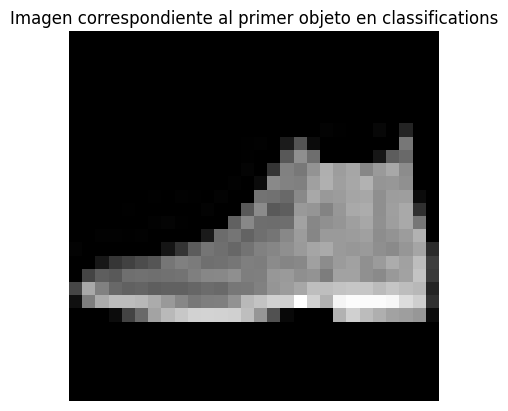


Para el modelo con 1024 neuronas en la capa oculta:


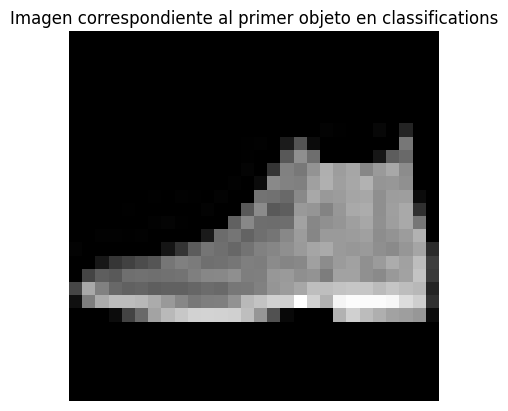

In [18]:
#Realizo una muestra de imagen para comprobar si de verdad la clase es la misma para ambas:
import matplotlib.pyplot as plt

def visualize_predicted_image(classifications, test_images, test_labels):
    predicted_class = np.argmax(classifications[0])
    index = np.where(test_labels == predicted_class)[0][0]
    plt.figure()
    plt.imshow(test_images[index], cmap='gray')
    plt.title("Imagen correspondiente al primer objeto en classifications")
    plt.axis('off')
    plt.show()

print("Para el modelo con 512 neuronas en la capa oculta:")
visualize_predicted_image(classifications_512, test_images, test_labels)

print("\nPara el modelo con 1024 neuronas en la capa oculta:")
visualize_predicted_image(classifications_1024, test_images, test_labels)


In [20]:
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = np.where(train_labels > 4, 4, train_labels)
test_labels = np.where(test_labels > 4, 4, test_labels)

train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

#Algunas observaciones sobre las modificaciones realizadas: 
#Colocación del categorical_crossentropy de one-hot y la redefinición de etiquetas para el rango [0- 4]
#Ya que o sino no se podría realizar la clasificación porque las etiquetas estarán fuera del rango válido para el 
#número de clases definidas en la capa de salida. 

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8593 - loss: 0.3901 - val_accuracy: 0.8800 - val_loss: 0.3094
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8982 - loss: 0.2677 - val_accuracy: 0.8961 - val_loss: 0.2788
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9080 - loss: 0.2403 - val_accuracy: 0.8902 - val_loss: 0.2779
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9137 - loss: 0.2245 - val_accuracy: 0.9009 - val_loss: 0.2626
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9188 - loss: 0.2117 - val_accuracy: 0.9058 - val_loss: 0.2425
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9197 - loss: 0.2074 - val_accuracy: 0.9072 - val_loss: 0.2491
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9223 - loss: 0.1970 - val_accuracy: 0.9071 - val_loss: 0.2383
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9255 - loss: 0.1898 - val_accuracy: 0.

In [21]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Requisitos del modelo:
# Hidden layer de 128 unidades, activación sigmoid y optimizador Adam
# Última capa con activación softmax
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), 
    layers.Dense(128, activation='sigmoid'),  
    layers.Dense(10, activation='softmax')  
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Se piden 10 epochs y un batch size de 64 
history = model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_data=(test_images, test_labels))

# Se muestran también los resultados de loss y accuracy por cada epoch
losses = history.history['loss']
accuracies = history.history['accuracy']
val_losses = history.history['val_loss']
val_accuracies = history.history['val_accuracy']

for epoch in range(len(losses)):
    print("Epoch {}: Loss={:.4f}, Accuracy={:.4f}, Val Loss={:.4f}, Val Accuracy={:.4f}"
          .format(epoch+1, losses[epoch], accuracies[epoch], val_losses[epoch], val_accuracies[epoch]))


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7442 - loss: 0.8171 - val_accuracy: 0.8371 - val_loss: 0.4602
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8464 - loss: 0.4291 - val_accuracy: 0.8318 - val_loss: 0.4585
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8641 - loss: 0.3801 - val_accuracy: 0.8585 - val_loss: 0.3927
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8750 - loss: 0.3483 - val_accuracy: 0.8619 - val_loss: 0.3874
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8789 - loss: 0.3381 - val_accuracy: 0.8647 - val_loss: 0.3740
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8845 - loss: 0.3168 - val_accuracy: 0.8562 - val_loss: 0.3968
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8885 - loss: 0.3041 - val_accuracy: 0.8699 - val_loss: 0.3631
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8948 - loss: 0.2910 - val_accuracy: 0.

In [22]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Requisitos del modelo:
# Hidden layer de 128 unidades, activación sigmoid y optimizador Adam
# Última capa con activación softmax
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), 
    layers.Dense(128, activation='sigmoid'),  
    layers.Dense(10, activation='softmax')  
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Se piden 10 epochs y un batch size de 64 
history = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_data=(test_images, test_labels))

# Se muestran también los resultados de loss y accuracy por cada epoch
losses = history.history['loss']
accuracies = history.history['accuracy']
val_losses = history.history['val_loss']
val_accuracies = history.history['val_accuracy']

for epoch in range(len(losses)):
    print("Epoch {}: Loss={:.4f}, Accuracy={:.4f}, Val Loss={:.4f}, Val Accuracy={:.4f}"
          .format(epoch+1, losses[epoch], accuracies[epoch], val_losses[epoch], val_accuracies[epoch]))
    

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7488 - loss: 0.8258 - val_accuracy: 0.8328 - val_loss: 0.4645
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8521 - loss: 0.4190 - val_accuracy: 0.8471 - val_loss: 0.4187
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8639 - loss: 0.3768 - val_accuracy: 0.8553 - val_loss: 0.4000
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8721 - loss: 0.3519 - val_accuracy: 0.8660 - val_loss: 0.3770
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8796 - loss: 0.3332 - val_accuracy: 0.8694 - val_loss: 0.3643
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8863 - loss: 0.3154 - val_accuracy: 0.8713 - val_loss: 0.3595
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8895 - loss: 0.3036 - val_accuracy: 0.8708 - val_loss: 0.3572
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8930 - loss: 0.2936 - val_accuracy: 0.

# Utilización de Early stop


In [23]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

In [24]:
import tensorflow as tf
print(tf.__version__)

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('loss') is not None and logs.get('loss') >= 0.4:
            print("\nAlcanzado el 40% de pérdida, se cancela el entrenamiento!!")
            self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 
callbacks = MyCallback()

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.15.0


Epoch 1/50
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7845 - loss: 0.6111
Alcanzado el 40% de pérdida, se cancela el entrenamiento!!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7847 - loss: 0.6105


## Utilización de unidades de activación

In [25]:
# Primer modelo con unidades sigmoid:
model_sigmoid = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

model_sigmoid.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_sigmoid = model_sigmoid.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Segundo modelo con unidades ReLU:
model_relu = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_relu.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_relu = model_relu.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7022 - loss: 0.8249 - val_accuracy: 0.8477 - val_loss: 0.4326
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8569 - loss: 0.3920 - val_accuracy: 0.8566 - val_loss: 0.4026
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8740 - loss: 0.3411 - val_accuracy: 0.8568 - val_loss: 0.3853
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8826 - loss: 0.3141 - val_accuracy: 0.8704 - val_loss: 0.3567
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8906 - loss: 0.2949 - val_accuracy: 0.8801 - val_loss: 0.3419
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8979 - loss: 0.2789 - val_accuracy: 0.8803 - val_loss: 0.3323
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8996 - loss: 0.2667 - val_accuracy: 0.8826 - val_loss: 0.3248
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9070 - loss: 0.2474 -

In [26]:
#Creación del Modelo con TanH 
model_tanh = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='tanh'),
    layers.Dense(256, activation='tanh'),
    layers.Dense(128, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model_tanh.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])


history_tanh = model_tanh.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7894 - loss: 0.5745 - val_accuracy: 0.8497 - val_loss: 0.4118
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8567 - loss: 0.3925 - val_accuracy: 0.8446 - val_loss: 0.4066
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8697 - loss: 0.3527 - val_accuracy: 0.8656 - val_loss: 0.3663
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8761 - loss: 0.3327 - val_accuracy: 0.8543 - val_loss: 0.3892
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8813 - loss: 0.3214 - val_accuracy: 0.8578 - val_loss: 0.3838
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8854 - loss: 0.3088 - val_accuracy: 0.8679 - val_loss: 0.3671
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8868 - loss: 0.3013 - val_accuracy: 0.8693 - val_loss: 0.3700
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8880 - loss: 0.3002

In [27]:
# Primer modelo con inicialización de parámetros con ceros:
model_zeros = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_initializer='zeros'),
    layers.Dense(10, activation='softmax')
])

model_zeros.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
history_zeros = model_zeros.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Segundo modelo con inicialización de parámetros con una variable aleatoria normal:
model_normal = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_initializer='random_normal'),
    layers.Dense(10, activation='softmax')
])

model_normal.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
history_normal = model_normal.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Tercer modelo con inicialización de parámetros con capa dense de estrategia glorot uniform:
model_glorot_uniform = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
    layers.Dense(10, activation='softmax')
])

model_glorot_uniform.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
history_glorot_uniform = model_glorot_uniform.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1017 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0982 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1002 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1011 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0990 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0974 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0973 - loss: 2.3028 - 

## Utilización de Optimizadores

In [28]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

#Primer modelo de base con Adam:
model_base = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), 
    layers.Dense(128, activation='sigmoid', kernel_initializer='glorot_uniform'),  
    layers.Dense(10, activation='softmax')  
])
model_base.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_adam = model_base.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

#Segundo Modelo con SGD como optimizador
model_sgd = models.clone_model(model_base)
model_sgd.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history_sgd = model_sgd.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

#Tercer Modelo con RMSprop como optimizador
model_rmsprop = models.clone_model(model_base)
model_rmsprop.compile(optimizer='rmsprop',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

print("Resultados del modelo con Adam:")
print("Loss y Accuracy por cada epoch:")
for epoch, (loss, acc) in enumerate(zip(history_adam.history['loss'], history_adam.history['accuracy'])):
    print("Epoch {}: Loss={:.4f}, Accuracy={:.4f}".format(epoch+1, loss, acc))
print("\nLoss y Accuracy en el conjunto de validación:")
print("Final Loss={:.4f}, Final Accuracy={:.4f}\n".format(history_adam.history['val_loss'][-1], history_adam.history['val_accuracy'][-1]))

print("\nResultados del modelo con SGD:")
print("Loss y Accuracy por cada epoch:")
for epoch, (loss, acc) in enumerate(zip(history_sgd.history['loss'], history_sgd.history['accuracy'])):
    print("Epoch {}: Loss={:.4f}, Accuracy={:.4f}".format(epoch+1, loss, acc))
print("\nLoss y Accuracy en el conjunto de validación:")
print("Final Loss={:.4f}, Final Accuracy={:.4f}\n".format(history_sgd.history['val_loss'][-1], history_sgd.history['val_accuracy'][-1]))

print("\nResultados del modelo con RMSprop:")
print("Loss y Accuracy por cada epoch:")
for epoch, (loss, acc) in enumerate(zip(history_rmsprop.history['loss'], history_rmsprop.history['accuracy'])):
    print("Epoch {}: Loss={:.4f}, Accuracy={:.4f}".format(epoch+1, loss, acc))
print("\nLoss y Accuracy en el conjunto de validación:")
print("Final Loss={:.4f}, Final Accuracy={:.4f}".format(history_rmsprop.history['val_loss'][-1], history_rmsprop.history['val_accuracy'][-1]))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7301 - loss: 0.8408 - val_accuracy: 0.8288 - val_loss: 0.4796
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8458 - loss: 0.4266 - val_accuracy: 0.8475 - val_loss: 0.4242
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8597 - loss: 0.3875 - val_accuracy: 0.8535 - val_loss: 0.3984
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8739 - loss: 0.3513 - val_accuracy: 0.8628 - val_loss: 0.3779
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8802 - loss: 0.3298 - val_accuracy: 0.8618 - val_loss: 0.3822
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8843 - loss: 0.3165 - val_accuracy: 0.8648 - val_loss: 0.3683
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8898 - loss: 0.3041 - val_accuracy: 0.8755 - val_loss: 0.3532
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8921 - loss: 0.2944 - val_accuracy: 0.

In [30]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.00000001)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.00000001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0000005)),
    layers.Dropout(0.5),  # Dropout para evitar el overfitting
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=35, batch_size=128, 
                    validation_data=(test_images, test_labels), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Accuracy on test set:", test_accuracy)


Epoch 1/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7017 - loss: 0.9490 - val_accuracy: 0.8427 - val_loss: 0.4371
Epoch 2/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8411 - loss: 0.4724 - val_accuracy: 0.8514 - val_loss: 0.4076
Epoch 3/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8555 - loss: 0.4154 - val_accuracy: 0.8521 - val_loss: 0.3953
Epoch 4/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8742 - loss: 0.3713 - val_accuracy: 0.8647 - val_loss: 0.3843
Epoch 5/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8783 - loss: 0.3503 - val_accuracy: 0.8735 - val_loss: 0.3505
Epoch 6/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8832 - loss: 0.3325 - val_accuracy: 0.8765 - val_loss: 0.3496
Epoch 7/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8863 - loss: 0.3208 - val_accuracy: 0.8759 - val_loss: 0.3431
Epoch 8/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8951 - loss: 0.2985 - val_accuracy: 0.